In [ ]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [ ]:
train = pd.read_csv('/kaggle/input/tmdb-box-office-prediction/train.csv')
test = pd.read_csv('/kaggle/input/tmdb-box-office-prediction/test.csv')

In [ ]:
X_train = train.drop(['revenue'],axis=1)
y_train = train['revenue']
print(X_train.shape, y_train.shape)

(3000, 22) (3000,)


In [ ]:
X = pd.concat([X_train, test], axis=0)

In [ ]:
X.head(3)

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de..."
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de..."
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de..."


In [ ]:
X['has_homepage'] = X['homepage'].isnull() == False
X['is_original_english'] = X['original_language'] == 'en'
X['has_collection'] = X['belongs_to_collection'].isnull() == False
X['has_two_titles'] = X['original_title'] != X['title']
X.drop(['status','original_language','poster_path', 'homepage', 'imdb_id','belongs_to_collection', 'id'], axis=1, inplace=True)
X.head(2)

,budget,genres,original_title,overview,popularity,production_companies,production_countries,release_date,runtime,spoken_languages,tagline,title,Keywords,cast,crew,has_homepage,is_original_english,has_collection,has_two_titles
0,14000000,"[{'id': 35, 'name': 'Comedy'}]",Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",False,True,True,False
1,40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,"[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...",8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",False,True,True,False


In [ ]:
X.columns

Index(['budget', 'genres', 'original_title', 'overview', 'popularity',
       'production_companies', 'production_countries', 'release_date',
       'runtime', 'spoken_languages', 'tagline', 'title', 'Keywords', 'cast',
       'crew', 'has_homepage', 'is_original_english', 'has_collection',
       'has_two_titles'],
      dtype='object')

In [ ]:
X.loc[pd.isnull(X['spoken_languages']) == True,'spoken_languages'] = 0
X['lang'] = list(map(lambda x: [i['iso_639_1'] for i in eval(x)] if x!=0 else [], X['spoken_languages'].values))
X['n_lang'] = X['lang'].apply(lambda x: len(x))

# temp_lang = ' '.join(list(map(lambda x: ' '.join(x), X['lang']))).split(' ')

spoken_features = ['' + i for i in ['', 'la', 'it', 'cs', 'ta', 'pt', 'hu', 'zh', 'pl', 'ar', 'en', 'ja', 'de', 'ko', 'cn', 'tr',
 'he', 'sv', 'el', 'ru', 'fr', 'es', 'hi', 'th']]

for i in spoken_features:
    X[i] = X['lang'].apply(lambda x: i[7:] in x)

X.drop(['original_title', 'spoken_languages', 'lang'], axis=1, inplace=True)

In [ ]:
X.head(2)

,budget,genres,overview,popularity,production_companies,production_countries,release_date,runtime,tagline,title,...,cn,tr,he,sv,el,ru,fr,es,hi,th
0,14000000,"[{'id': 35, 'name': 'Comedy'}]","When Lou, who has become the ""father of the In...",6.575393,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",2/20/15,93.0,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,...,False,False,False,False,False,False,False,False,False,False
1,40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",Mia Thermopolis is now a college graduate and ...,8.248895,"[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...",8/6/04,113.0,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
X.loc[pd.isnull(X['genres']) == True,'genres'] = 0
genres = set(' '.join([' '.join(i) for i in list(map(lambda x: [i['name'] for i in eval(x)] if x!=0 else [], X['genres'].values))]).split())

X['genres'] = list(map(lambda x: [i['name'] for i in eval(x)] if x!=0 else [], X['genres'].values))

for i in genres:
    X['genre_' + i] = X['genres'].apply(lambda x: i in x)

In [ ]:
X['n_genres'] =  X['genres'].apply(lambda x: len(x))

In [ ]:
X['release_month'] = 0
X['release_day'] = 0
X['release_year'] = 0

X = pd.concat([X, X['release_date'].str.split('/', expand=True)], axis=1)
X.head(2)

,budget,genres,overview,popularity,production_companies,production_countries,release_date,runtime,tagline,title,...,genre_Fiction,genre_Drama,genre_Horror,n_genres,release_month,release_day,release_year,0,1,2
0,14000000,[Comedy],"When Lou, who has become the ""father of the In...",6.575393,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",2/20/15,93.0,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,...,False,False,False,1,0,0,0,2,20,15
1,40000000,"[Comedy, Drama, Family, Romance]",Mia Thermopolis is now a college graduate and ...,8.248895,"[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...",8/6/04,113.0,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,...,False,True,False,4,0,0,0,8,6,04


In [ ]:
X.iloc[:,-1] = X.iloc[:,-1].fillna('0').astype(int)

In [ ]:
year_mod = []
for i in X.iloc[:,-1].values:
    if i in range(0, 19):
        year_mod.extend([2000 + i])
    else:
        year_mod.extend([1900 + i])
year_mod

X['release_year'] = year_mod

In [ ]:
X.head(2)

,budget,genres,overview,popularity,production_companies,production_countries,release_date,runtime,tagline,title,...,genre_Fiction,genre_Drama,genre_Horror,n_genres,release_month,release_day,release_year,0,1,2
0,14000000,[Comedy],"When Lou, who has become the ""father of the In...",6.575393,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",2/20/15,93.0,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,...,False,False,False,1,0,0,2015,2,20,15
1,40000000,"[Comedy, Drama, Family, Romance]",Mia Thermopolis is now a college graduate and ...,8.248895,"[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...",8/6/04,113.0,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,...,False,True,False,4,0,0,2004,8,6,4


In [ ]:
X = pd.concat([X, pd.get_dummies(X[0], prefix='release_month')], axis=1)
X.head(2)

,budget,genres,overview,popularity,production_companies,production_countries,release_date,runtime,tagline,title,...,release_month_11,release_month_12,release_month_2,release_month_3,release_month_4,release_month_5,release_month_6,release_month_7,release_month_8,release_month_9
0,14000000,[Comedy],"When Lou, who has become the ""father of the In...",6.575393,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",2/20/15,93.0,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,...,0,0,1,0,0,0,0,0,0,0
1,40000000,"[Comedy, Drama, Family, Romance]",Mia Thermopolis is now a college graduate and ...,8.248895,"[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...",8/6/04,113.0,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
X['release_date'] = pd.to_datetime(X['release_date'])

In [ ]:
X['release_weekday'] = X['release_date'].dt.weekday.fillna(8).astype(int)

In [ ]:
X.loc[:,'production_companies'] = X.loc[:,'production_companies'].fillna('[]')

companies = ','.join([','.join(i) for i in list(map(lambda x: [i['name'] for i in eval(x)], X['production_companies'].values))]).split(',')
unique_companies = set(companies)
# print(companies)

X['production_companies'] = list(map(lambda x: [i['name'] for i in eval(x)], X['production_companies'].values))

In [ ]:
prod_count = {i: sum([1 for j in companies if i == j]) for i in unique_companies}

most_famous_prod = [k for k,v in prod_count.items() if v > 100 and k]
famous_prod = [k for k,v in prod_count.items() if 30 <= v < 100 and k]

In [ ]:
X['n_production_companies'] = X['production_companies'].apply(lambda x: len(x))
X['most_famous_prod'] = X['production_companies'].apply(lambda x: sum([1 for i in x if i in most_famous_prod]))
X['famous_prod'] = X['production_companies'].apply(lambda x: sum([1 for i in x if i in famous_prod]))
X.head(2)

,budget,genres,overview,popularity,production_companies,production_countries,release_date,runtime,tagline,title,...,release_month_4,release_month_5,release_month_6,release_month_7,release_month_8,release_month_9,release_weekday,n_production_companies,most_famous_prod,famous_prod
0,14000000,[Comedy],"When Lou, who has become the ""father of the In...",6.575393,"[Paramount Pictures, United Artists, Metro-Gol...","[{'iso_3166_1': 'US', 'name': 'United States o...",2015-02-20,93.0,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,...,0,0,0,0,0,0,4,3,3,0
1,40000000,"[Comedy, Drama, Family, Romance]",Mia Thermopolis is now a college graduate and ...,8.248895,[Walt Disney Pictures],"[{'iso_3166_1': 'US', 'name': 'United States o...",2004-08-06,113.0,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,...,0,0,0,0,1,0,4,1,1,0


In [ ]:
X.loc[:,'production_countries'] = X.loc[:,'production_countries'].fillna('[]')

countries = ','.join([','.join(i) for i in list(map(lambda x: [i['iso_3166_1'] for i in eval(x)], X['production_countries'].values))]).split(',')
unique_countries = set(countries)
# print(unique_countries)

X['production_countries'] = list(map(lambda x: [i['iso_3166_1'] for i in eval(x)], X['production_countries'].values))

In [ ]:
country_count = {i: sum([1 for j in countries if i == j]) for i in unique_countries}
# sorted(country_count.items(), key=lambda x: x[1], reverse=True)

most_famous_countries= [k for k,v in country_count.items() if v > 100 and k]
famous_countries = [k for k,v in country_count.items() if 30 <= v < 100 and k]

X['n_production_countries'] = X['production_countries'].apply(lambda x: len(x))
X['most_famous_countries'] = X['production_countries'].apply(lambda x: sum([1 for i in x if i in most_famous_countries]))
X['famous_countries'] = X['production_countries'].apply(lambda x: sum([1 for i in x if i in famous_countries]))

In [ ]:
X.columns

Index([                'budget',                 'genres',
                     'overview',             'popularity',
         'production_companies',   'production_countries',
                 'release_date',                'runtime',
                      'tagline',                  'title',
                     'Keywords',                   'cast',
                         'crew',           'has_homepage',
          'is_original_english',         'has_collection',
               'has_two_titles',                 'n_lang',
                             '',                     'la',
                           'it',                     'cs',
                           'ta',                     'pt',
                           'hu',                     'zh',
                           'pl',                     'ar',
                           'en',                     'ja',
                           'de',                     'ko',
                           'cn',                     'tr

In [ ]:
discrete_features = [features for features in X.columns if (len(X[features].unique()))<50 and X[features].dtypes !='O'and features not in ['id']]
X[discrete_features].head()

,has_homepage,is_original_english,has_collection,has_two_titles,n_lang,,la,it,cs,ta,...,release_month_8,release_month_9,release_weekday,n_production_companies,most_famous_prod,famous_prod,n_production_countries,most_famous_countries,famous_countries,has_tagline
0,0,1,1,0,1,0,0,0,0,0,...,0,0,4,3,3,0,1,1,0,0
1,0,1,1,0,1,0,0,0,0,0,...,1,0,4,1,1,0,1,1,0,0
2,1,1,0,0,1,0,0,0,0,0,...,0,0,4,3,0,1,1,1,0,0
3,1,0,0,0,2,0,0,0,0,0,...,0,0,4,0,0,0,1,1,0,1
4,0,0,0,1,1,0,0,0,0,0,...,0,0,3,0,0,0,1,0,1,1


### Here are the contributed cells: Visualizations

In [ ]:
continuous_feature=[features for features in X.columns if X[features].dtypes !='O'and features not in discrete_features + ['index']]
X[continuous_feature].head()

,budget,popularity,runtime,release_year,inflationBudget
0,-0.022635,-0.003543,-0.043542,2015,-0.030385
1,0.045786,-0.000486,0.015629,2004,0.051948
2,-0.050793,0.101893,-0.008039,2014,-0.056634
3,-0.056320,-0.009754,0.042257,2012,-0.061800
4,-0.059478,-0.013456,0.030422,2009,-0.064909


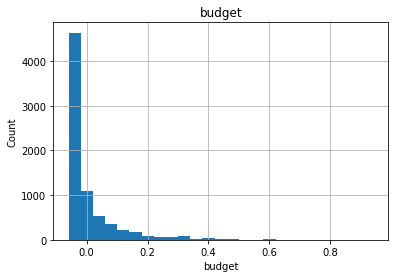

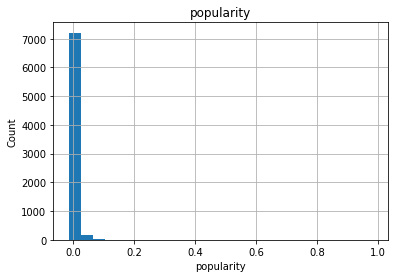

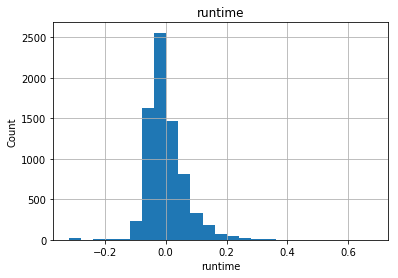

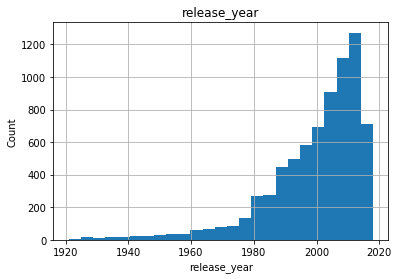

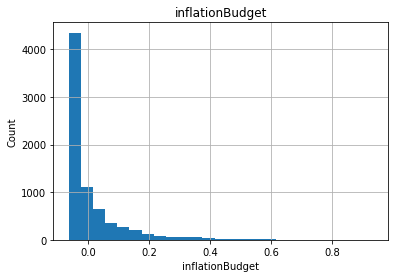

In [ ]:
#plotting their histograms:
for features in continuous_feature:
    data=X.copy()
    data[features].hist(bins=25)
    plt.xlabel(features)
    plt.ylabel("Count")
    plt.title(features)
    plt.show()

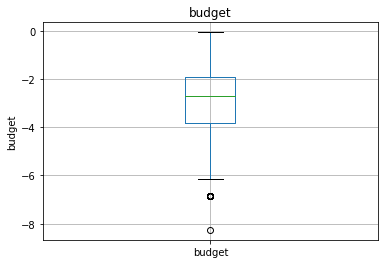

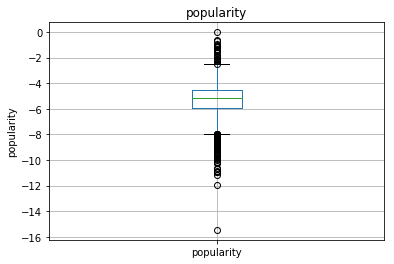

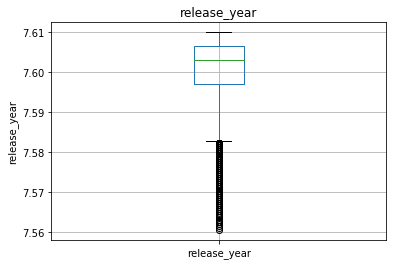

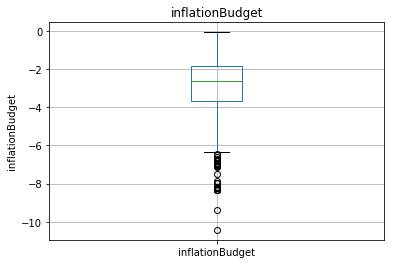

In [ ]:
#Lets plot outliers:

for feature in continuous_feature:
    data=X.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()

In [ ]:
X['has_tagline'] = X['tagline'].apply(lambda x: pd.isnull(x))

In [ ]:
X.drop(['genres', 'overview', 'production_companies', 'production_countries', 'release_date', 'tagline', 'release_month', 'release_day', 0, 2,
       'title', 'Keywords', 'cast','crew'], axis=1, inplace=True)
X.head(2)

,budget,popularity,runtime,has_homepage,is_original_english,has_collection,has_two_titles,n_lang,,la,...,release_month_8,release_month_9,release_weekday,n_production_companies,most_famous_prod,famous_prod,n_production_countries,most_famous_countries,famous_countries,has_tagline
0,14000000,6.575393,93.0,False,True,True,False,1,False,False,...,0,0,4,3,3,0,1,1,0,False
1,40000000,8.248895,113.0,False,True,True,False,1,False,False,...,1,0,4,1,1,0,1,1,0,False


In [ ]:
X['runtime'] = X['runtime'].fillna(X['runtime'].mean())

In [ ]:
X[1] = X[1].fillna(1)

In [ ]:
for f in X.dtypes[X.dtypes == 'bool'].index:
    X[f] = X[f].astype(int)

In [ ]:
X['popularity'] = (X['popularity'] - X['popularity'].mean()) / (X['popularity'].max()-X['popularity'].min())

In [ ]:
X['runtime'] = (X['runtime'] - X['runtime'].mean()) / (X['runtime'].max()-X['runtime'].min())

In [ ]:
X['inflationBudget'] = X['budget'] + X['budget']*1.8/100*(2019-X['release_year'])

In [ ]:
X['budget'] = (X['budget'] - X['budget'].mean()) / (X['budget'].max()-X['budget'].min())
X['inflationBudget'] = (X['inflationBudget'] - X['inflationBudget'].mean()) / (X['inflationBudget'].max()-X['inflationBudget'].min())

In [ ]:
X.head(2)

,budget,popularity,runtime,has_homepage,is_original_english,has_collection,has_two_titles,n_lang,,la,...,release_month_9,release_weekday,n_production_companies,most_famous_prod,famous_prod,n_production_countries,most_famous_countries,famous_countries,has_tagline,inflationBudget
0,-0.022635,-0.003543,-0.043542,0,1,1,0,1,0,0,...,0,4,3,3,0,1,1,0,0,-0.030385
1,0.045786,-0.000486,0.015629,0,1,1,0,1,0,0,...,0,4,1,1,0,1,1,0,0,0.051948


In [ ]:
X = X.reset_index()

In [ ]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression(normalize=True)
regressor.fit(X[:X_train.shape[0]], y_train)

y_test_pred = regressor.predict(X[X_train.shape[0]:])

In [ ]:
y_test_pred.shape

(4398,)

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_log_error, make_scorer

score = cross_val_score(regressor, X[:X_train.shape[0]], y_train)
(abs(score[0]) + abs(score[1]) + abs(score[2]))/3

0.6476250106542181

In [ ]:
# import xgboost as xgb

# def xgb_model(trn_x, trn_y, val_x, val_y, test, verbose) :
    
#     params = {'objective': 'reg:linear', 
#               'eta': 0.01, 
#               'max_depth': 6, 
#               'subsample': 0.6, 
#               'colsample_bytree': 0.7,  
#               'eval_metric': 'rmse', 
#               'seed': random_seed, 
#               'silent': True,
#     }
    
#     record = dict()
#     model = xgb.train(params
#                       , xgb.DMatrix(trn_x, trn_y)
#                       , 100000
#                       , [(xgb.DMatrix(trn_x, trn_y), 'train'), (xgb.DMatrix(val_x, val_y), 'valid')]
#                       , verbose_eval=verbose
#                       , early_stopping_rounds=500
#                       , callbacks = [xgb.callback.record_evaluation(record)])
#     best_idx = np.argmin(np.array(record['valid']['rmse']))

#     val_pred = model.predict(xgb.DMatrix(val_x), ntree_limit=model.best_ntree_limit)
#     test_pred = model.predict(xgb.DMatrix(test), ntree_limit=model.best_ntree_limit)

#     return {'val':val_pred, 'test':test_pred, 'error':record['valid']['rmse'][best_idx], 'importance':[i for k, i in model.get_score().items()]}

In [ ]:
# import lightgbm as lgb

# def lgb_model(trn_x, trn_y, val_x, val_y, test, verbose) :

#     params = {'objective':'regression',
#          'num_leaves' : 30,
#          'min_data_in_leaf' : 20,
#          'max_depth' : 9,
#          'learning_rate': 0.004,
#          #'min_child_samples':100,
#          'feature_fraction':0.9,
#          "bagging_freq": 1,
#          "bagging_fraction": 0.9,
#          'lambda_l1': 0.2,
#          "bagging_seed": random_seed,
#          "metric": 'rmse',
#          #'subsample':.8, 
#           #'colsample_bytree':.9,
#          "random_state" : random_seed,
#          "verbosity": -1}

#     record = dict()
#     model = lgb.train(params
#                       , lgb.Dataset(trn_x, trn_y)
#                       , num_boost_round = 100000
#                       , valid_sets = [lgb.Dataset(val_x, val_y)]
#                       , verbose_eval = verbose
#                       , early_stopping_rounds = 500
#                       , callbacks = [lgb.record_evaluation(record)]
#                      )
#     best_idx = np.argmin(np.array(record['valid_0']['rmse']))

#     val_pred = model.predict(val_x, num_iteration = model.best_iteration)
#     test_pred = model.predict(test, num_iteration = model.best_iteration)
    
#     return {'val':val_pred, 'test':test_pred, 'error':record['valid_0']['rmse'][best_idx], 'importance':model.feature_importance('gain')}

In [ ]:
# from catboost import CatBoostRegressor

# def cat_model(trn_x, trn_y, val_x, val_y, test, verbose) :
    
#     model = CatBoostRegressor(iterations=100000,
#                                  learning_rate=0.004,
#                                  depth=5,
#                                  eval_metric='RMSE',
#                                  colsample_bylevel=0.8,
#                                  random_seed = random_seed,
#                                  bagging_temperature = 0.2,
#                                  metric_period = None,
#                                  early_stopping_rounds=200
#                                 )
#     model.fit(trn_x, trn_y,
#                  eval_set=(val_x, val_y),
#                  use_best_model=True,
#                  verbose=False)
    
#     val_pred = model.predict(val_x)
#     test_pred = model.predict(test)
    
#     return {'val':val_pred, 
#             'test':test_pred, 
#             'error':model.get_best_score()['validation_0']['RMSE']}

In [ ]:
# result_dict = dict()
# val_pred = np.zeros(train.shape[0])
# test_pred = np.zeros(test.shape[0])
# final_err = 0
# verbose = False

# for i, (trn, val) in enumerate(fold) :
#     print(i+1, "fold.    RMSE")
    
#     trn_x = train.loc[trn, :]
#     trn_y = y[trn]
#     val_x = train.loc[val, :]
#     val_y = y[val]
    
#     fold_val_pred = []
#     fold_test_pred = []
#     fold_err = []
    
#     #""" xgboost
#     start = datetime.now()
#     result = xgb_model(trn_x, trn_y, val_x, val_y, test, verbose)
#     fold_val_pred.append(result['val']*0.2)
#     fold_test_pred.append(result['test']*0.2)
#     fold_err.append(result['error'])
#     print("xgb model.", "{0:.5f}".format(result['error']), '(' + str(int((datetime.now()-start).seconds/60)) + 'm)')
#     #"""
    
#     #""" lightgbm
#     start = datetime.now()
#     result = lgb_model(trn_x, trn_y, val_x, val_y, test, verbose)
#     fold_val_pred.append(result['val']*0.4)
#     fold_test_pred.append(result['test']*0.4)
#     fold_err.append(result['error'])
#     print("lgb model.", "{0:.5f}".format(result['error']), '(' + str(int((datetime.now()-start).seconds/60)) + 'm)')
#     #"""
    
#     #""" catboost model
#     start = datetime.now()
#     result = cat_model(trn_x, trn_y, val_x, val_y, test, verbose)
#     fold_val_pred.append(result['val']*0.4)
#     fold_test_pred.append(result['test']*0.4)
#     fold_err.append(result['error'])
#     print("cat model.", "{0:.5f}".format(result['error']), '(' + str(int((datetime.now()-start).seconds/60)) + 'm)')
#     #"""
    
#     # mix result of multiple models
#     val_pred[val] += np.mean(np.array(fold_val_pred), axis = 0)
#     #print(fold_test_pred)
#     #print(fold_test_pred.shape)
#     #print(fold_test_pred.columns)
#     test_pred += np.mean(np.array(fold_test_pred), axis = 0) / k
#     final_err += (sum(fold_err) / len(fold_err)) / k
    
#     print("---------------------------")
#     print("avg   err.", "{0:.5f}".format(sum(fold_err) / len(fold_err)))
#     print("blend err.", "{0:.5f}".format(np.sqrt(np.mean((np.mean(np.array(fold_val_pred), axis = 0) - val_y)**2))))
    
#     print('')
    
# print("fianl avg   err.", final_err)
# print("fianl blend err.", np.sqrt(np.mean((val_pred - y)**2)))

In [ ]:
submission = pd.read_csv('/kaggle/input/tmdb-box-office-prediction/sample_submission.csv')
submission['revenue'] = y_test_pred
submission.to_csv('submission.csv', index=False)

<a href="./submission.csv"> Download File </a>